In [0]:
!pip install tensorflow==2.0

In [5]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


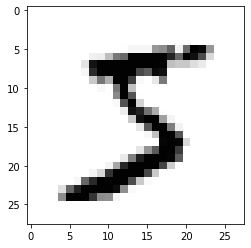

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = 'Greys', interpolation = 'None')

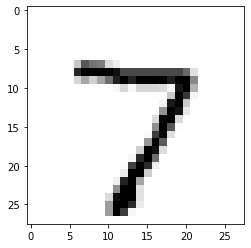

In [8]:
plt.imshow(x_test[0], cmap = 'Greys', interpolation = 'None')

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [10]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (60000, 784)
x_test shape:  (10000, 784)


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [15]:
import numpy as np

print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

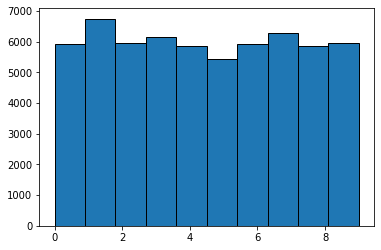

In [17]:
plt.hist(x = y_train, edgecolor = 'black')

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras import utils

In [0]:
n_classes = 10

y_train = utils.to_categorical(y_train, n_classes)
y_test = utils.to_categorical(y_test, n_classes)

In [22]:
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [0]:
model = Sequential()
model.add(Dense(512, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [27]:
history = model.fit(x_train, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 7s - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0849 - val_accuracy: 0.9817
Epoch 2/20
60000/60000 - 7s - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0652 - val_accuracy: 0.9863
Epoch 3/20
60000/60000 - 7s - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.0843 - val_accuracy: 0.9842
Epoch 4/20
60000/60000 - 7s - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0856 - val_accuracy: 0.9825
Epoch 5/20
60000/60000 - 7s - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.0804 - val_accuracy: 0.9851
Epoch 6/20
60000/60000 - 7s - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0.0768 - val_accuracy: 0.9833
Epoch 7/20
60000/60000 - 7s - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0794 - val_accuracy: 0.9841
Epoch 8/20
60000/60000 - 7s - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0832 - val_accuracy: 0.9838
Epoch 9/20
60000/60000 - 7s - loss: 0.0111 - accuracy: 0.9961 - val_loss: 0.0740 - val_accuracy: 0.9868
Epoch 10/20
60

In [0]:
model_name = 'keras_mnist.h5'
model.save(model_name)

In [35]:
print("Accuracy: ",model.evaluate(x_test, y_test)[1])

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================